In [13]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
# Load the dataset - sample_invoices.csv
file_path = 'C:/Users/praga/OneDrive - The University of Texas at Dallas/ELEVATE/Project/sample_invoices.csv' 
data = pd.read_csv(file_path)

# Display the data types of the columns
data_types = data.dtypes
print(data_types)

Invoice Number               object
Invoice Date                 object
Law Firm Name                object
Law Firm Location            object
Matter Number                object
Matter Name                  object
Matter Type                  object
Practice Group               object
Task Code                    object
Line Item Description        object
Timekeeper Name              object
Timekeeper Classification    object
Hours Billed                  int64
Hourly Rate                   int64
Amount                        int64
Date of Service              object
dtype: object


c:\Users\praga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\praga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\praga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\praga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


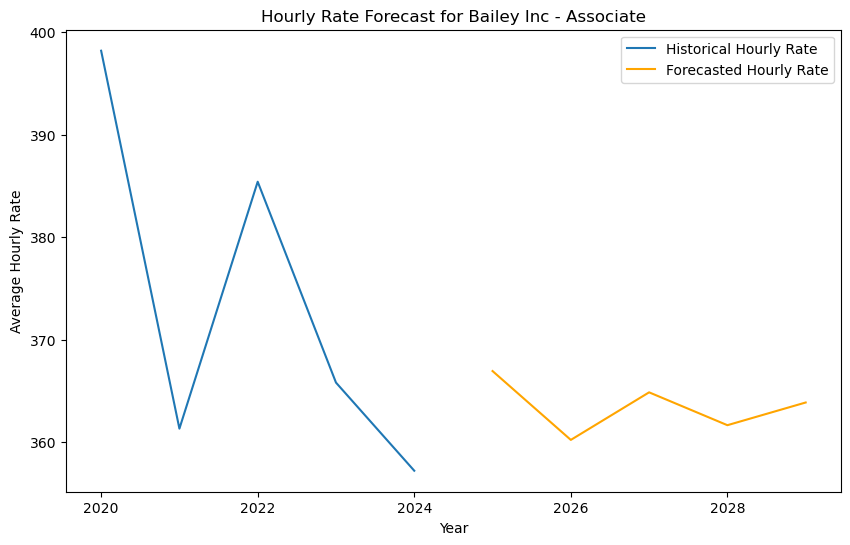

5    366.953019
6    360.239914
7    364.877396
8    361.673776
9    363.886870
Name: predicted_mean, dtype: float64


In [15]:
# Convert 'Invoice Date' to datetime format
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

# Extract the year from 'Invoice Date' to create a time series 
data['Year'] = data['Invoice Date'].dt.year

# Group by Law Firm, Timekeeper Classification, and Year to get average hourly rate for each combination
grouped_data = data.groupby(['Law Firm Name', 'Timekeeper Classification', 'Year'])['Hourly Rate'].mean().reset_index()

# Create a time series for a specific law firm and classification
law_firm = 'Bailey Inc'
classification = 'Associate'

# Filter data for the selected law firm and timekeeper classification
time_series_data = grouped_data[(grouped_data['Law Firm Name'] == law_firm) & 
                                (grouped_data['Timekeeper Classification'] == classification)]

# Set 'Year' as index for the time series
time_series_data.set_index('Year', inplace=True)

# Build ARIMA Model (p=1, d=1, q=1 are common starting parameters)
model = ARIMA(time_series_data['Hourly Rate'], order=(1,1,1))
model_fit = model.fit()

# Forecast future hourly rates(5 years)
forecast = model_fit.forecast(steps=5)

# Plot the historical data and forecasted data
plt.figure(figsize=(10,6))
plt.plot(time_series_data['Hourly Rate'], label='Historical Hourly Rate')
plt.plot(range(time_series_data.index[-1]+1, time_series_data.index[-1]+6), forecast, label='Forecasted Hourly Rate', color='orange')
plt.xlabel('Year')
plt.ylabel('Average Hourly Rate')
plt.title(f'Hourly Rate Forecast for {law_firm} - {classification}')
plt.legend()
plt.show()

# Display forecasted values
print(forecast)